In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


#python3 simulador_input.py modelo tipo_de_Grafo cant_nodos grado_salida seed prob_inc cant_it repet nombrearch

modelo = ['SIR']
porc_incub = ['0.02'] #500, 1000, 5000
grado = ['100']
seed = 123


for m in modelo:
    for pi in porc_incub:
        for g in grado:
            arg = 'python3 simulador_input.py ' + m + ' random 50000 ' + g + ' ' + str(seed) + ' ' + pi + ' 200 5 ' + m +'_Influenza_random2.csv'
            print(arg)
            seed+=1
            os.system(arg)

python3 simulador_input.py SIR random 50000 100 123 0.02 200 5 SIR_Influenza_random2.csv


In [2]:
# Load libraries
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns


modelos = ['SIS', 'SIRS', 'SIR']
pis = [0.02] #500, 1000, 5000
grados = [100,1000]

def mostrar_tabla_gr_pi(df, grado, pi):
    df_gr = df.loc[df['gr'] == grado].reset_index(drop=True)
    df_gr_pi = df_gr[df_gr['pi'] == pi].reset_index(drop=True)
    return df_gr_pi


plt.rcParams.update({'font.size': 15})

#Carga de datos
df_influenza = pd.read_csv('./resultados/SIR_Influenza_random.csv')
df_covid = pd.read_csv('./resultados/SIR_random.csv')
                      
df_T_covid = mostrar_tabla_gr_pi(df_covid, 100, 0.02)
df_T_influenza_100 = mostrar_tabla_gr_pi(df_influenza, 100, 0.02)
df_T_influenza_1000 = mostrar_tabla_gr_pi(df_influenza, 1000, 0.02)

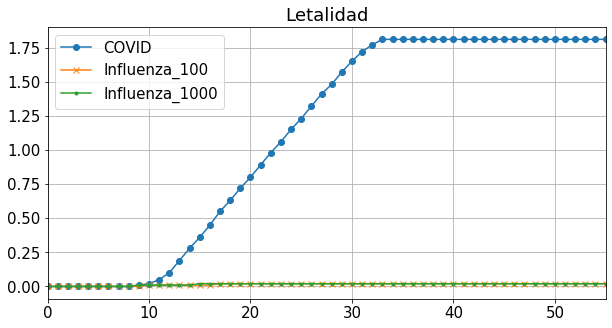

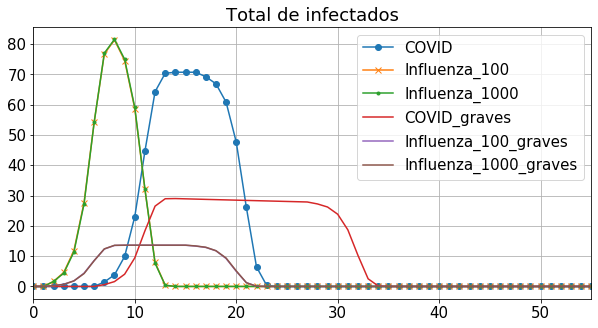

In [28]:
def graficar_letalidad():
    fig, axs = plt.subplots(figsize = (10,5))
    axs.title.set_text('Letalidad')
#     axs.set_yscale('log')
    axs.set_xlim([0,55])
    axs.plot(df_T_covid['muertos'], label ='COVID', marker='o')
    axs.plot(df_T_influenza_100['muertos'], label='Influenza_100', marker='x')
    axs.plot(df_T_influenza_1000['muertos'], label='Influenza_1000', marker='.')
    axs.legend(loc='best')
    axs.grid(True)
    
def graficar_infectados():
    fig, axs = plt.subplots(figsize = (10,5))
    axs.title.set_text('Total de infectados')
#     axs.set_yscale('log')
    axs.set_xlim([0,55])
    axs.plot(df_T_covid['i_mild'], label ='COVID', marker='o')
    axs.plot(df_T_influenza_100['i_mild'], label='Influenza_100', marker='x')
    axs.plot(df_T_influenza_1000['i_mild'], label='Influenza_1000', marker='.')
    axs.plot(df_T_covid['i_grave'], label ='COVID_graves')
    axs.plot(df_T_influenza_100['i_grave'], label='Influenza_100_graves')
    axs.plot(df_T_influenza_1000['i_grave'], label='Influenza_1000_graves')
    axs.legend(loc='best')
    axs.grid(True)

graficar_letalidad()
graficar_infectados()

